<a href="https://colab.research.google.com/github/Raman0805/BDDA_PROJECT1_GROUP7/blob/main/Project1_carprice_predictmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **CAR PRICE PREDICTION MODEL**

# **ABOUT THE DATASET**

The dataset contains information about various attributes related to cars. These attributes provide a comprehensive overview of each car entry and are valuable for analysis and prediction tasks related to car pricing and features. Here's a summary of the dataset attributes:

**ID:** A unique identifier for each car entry. This attribute helps distinguish one car from another in the dataset.

**Price:** The price of the car. This attribute serves as the target variable for prediction tasks. It's the value that you're trying to predict based on other features.

**Levy:** A potential additional cost or tax associated with the car purchase. This attribute indicates any extra charges beyond the base price.

**Manufacturer:** The company that produces the car. This attribute identifies the car's maker.

**Model:** The specific model name of the car. This attribute provides more detailed information about the car's variant.

**Prod. year:** The year the car was manufactured. This attribute gives an idea of the car's age.

**Category:**The category of the car (e.g., Jeep, Sedan, Coupe, Hatchback). This attribute classifies cars into different types.

**Leather interior:** Whether the car has a leather interior (Yes/No). This attribute indicates whether the car's interior is made of leather.

**Fuel type:**The type of fuel the car uses (e.g., Petrol, Diesel, Hybrid, CNG). This attribute specifies the car's fuel source.

**Engine volume:**The engine volume or displacement of the car's engine. This attribute provides information about the engine's capacity.

**Mileage:** The mileage or distance the car has traveled. This attribute gives an indication of the car's usage.

**Cylinders:** The number of cylinders in the car's engine. This attribute provides information about the engine's configuration.

**Gear box type:** The type of gear box (e.g., Automatic, Manual, Tiptronic). This attribute indicates the transmission type.

**Drive wheels:** The type of drive wheels (e.g., 4x4, Front, Rear). This attribute describes the car's wheel-drive configuration.

**Doors:** The number of doors in the car. This attribute specifies the number of entry points in the car.

**Wheel:** The position of the car's steering wheel (e.g., Left, Right). This attribute indicates the side of the car where the steering wheel is located.

**Color:** The color of the car. This attribute describes the external color of the car's body.

**Airbags:** The number of airbags in the car. This attribute indicates the safety features in terms of airbag count.

This dataset is suitable for various types of analyses and modeling, such as predicting car prices based on the provided attributes, understanding the impact of different features on car prices, and exploring trends in the automotive market.

## **Objective**

**Price Prediction:** The most obvious objective could be to predict the price of cars based on various features such as manufacturer, model, engine details, mileage, and more.

**Feature Importance Analysis:** Determine which features have the most significant impact on the car's price. This analysis could provide insights into what factors drive car prices.

**Model Comparison and Selection:** Compare different regression models to determine which one performs best in predicting car prices. This could involve evaluating metrics like Mean Absolute Error (MAE) or Root Mean Squared Error (RMSE).

**Data Preprocessing and Cleaning:** Explore the dataset to identify missing values, outliers, or inconsistent data. The objective here could be to preprocess and clean the data to improve the accuracy of price predictions.

**Insights for Manufacturers:** Analyze the dataset to provide insights to car manufacturers about the market demand for different types of cars, which features are most popular, and how those features affect pricing.

**Price Trends and Patterns:** Identify trends and patterns in car prices over time or across different manufacturers and models.

**Model creation** To create a model to predict the price as per avaibale factors

**Accuracy** To check the accuracy of model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import  RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from pathlib import Path
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# For skopt routines
! pip install scikit-optimize
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder # For Encoding Categorical Data [Nominal | Ordinal]
#  For plotting skopt results
! pip install 'scikit-optimize[plots]'
# 1.0 Clear ipython memory
#%reset -f
#Data manipulation and plotting modules
import numpy as np
import pandas as pd
#  Data pre-processing
#     z = (x-mean)/stdev
from sklearn.preprocessing import StandardScaler as ss
# Dimensionality reduction and noise removal
from sklearn.decomposition import PCA
#  Data splitting and model parameter search
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
# Model pipelining
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
# Hyperparameter optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from xgboost.sklearn import XGBClassifier
#Model evaluation metrics
from sklearn.metrics import accuracy_score, f1_score
#from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import plot_importance
# Permutation feature importance
from sklearn.inspection import permutation_importance
# 1.12 Misc
import time
import os
import gc
import random
#  Used in Randomized parameter search
from scipy.stats import uniform


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 2.0 MB/s eta 0:00:00


In [ ]:
#  Get data from gdrive:

from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
# Path to data folder:

pathToFolder = "/gdrive/MyDrive/bdda1"
# path + Filename:

path = Path(pathToFolder) / "/Car_price_prediction.csv"
path

PosixPath('/Car_price_prediction.csv')

In [ ]:
#Load data:

df = pd.read_csv(path)
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4,Automatic,Front,04-May,Left wheel,Silver,4


In [ ]:
df.info()
#display the summary information for the DataFrame, which includes the column names, data types, number of non-null values, and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Price             19237 non-null  int64 
 1   Levy              19237 non-null  object
 2   Manufacturer      19237 non-null  object
 3   Model             19237 non-null  object
 4   Prod. year        19237 non-null  int64 
 5   Category          19237 non-null  object
 6   Leather interior  19237 non-null  object
 7   Fuel type         19237 non-null  object
 8   Engine volume     19237 non-null  object
 9   Mileage           19237 non-null  int64 
 10  Cylinders         19237 non-null  int64 
 11  Gear box type     19237 non-null  object
 12  Drive wheels      19237 non-null  object
 13  Wheel             19237 non-null  object
 14  Color             19237 non-null  object
 15  Airbags           19237 non-null  int64 
dtypes: int64(5), object(11)
memory usage: 2.3+ MB


In [ ]:
#knowing the dataset shape
df.shape
#This means that the DataFrame has 19327 rows and 18 columns

(19237, 18)

In [ ]:
#calculating the null values of columns
df.isna().sum(axis = 0).sort_values(ascending = False)

ID                  0
Price               0
Color               0
Wheel               0
Doors               0
Drive wheels        0
Gear box type       0
Cylinders           0
Mileage             0
Engine volume       0
Fuel type           0
Leather interior    0
Category            0
Prod. year          0
Model               0
Manufacturer        0
Levy                0
Airbags             0
dtype: int64

In [ ]:
#dropping the columns
df.drop(['ID', 'Doors'], axis= 1 , inplace = True)

In [ ]:
#knowing the left columns
df.columns
# names of the remaining columns in the DataFrame after dropping the 'ID' and 'Doors' columns.

Index(['Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [ ]:
for i in df.columns:
  print(i, df[i].nunique())
  #display the column name followed by the count of unique values in that column. This can be useful for data exploration and understanding the characteristics of the dataset.

Price 2315
Levy 559
Manufacturer 65
Model 1590
Prod. year 54
Category 11
Leather interior 2
Fuel type 7
Engine volume 107
Mileage 7687
Cylinders 13
Gear box type 4
Drive wheels 3
Wheel 2
Color 16
Airbags 17


In [ ]:
#converting space and none to np.nan
df.replace(to_replace=[None], value=np.nan, inplace=True)
df.replace(to_replace='isnull', value=np.nan, inplace=True)
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
#performing data preprocessing on the DataFrame df to replace certain values with NaN (Not a Number), which is a common representation for missing or undefined data.

In [ ]:
#calculating the percentage of null values
df_missingpercent = df.isnull().sum(axis=0).sort_values(ascending=False)/len(df)*100
df_missingpercent.head()
#percentage of missing values for each column in the DataFrame df.

Price           0.0
Levy            0.0
Manufacturer    0.0
Model           0.0
Prod. year      0.0
dtype: float64

In [ ]:
df.columns

Index(['Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [ ]:
#knowing the unique values in each column for processing
df_unique = df.nunique().to_frame(name='Count of unique values')
df_unique
#calculating the count of unique values in each column of the DataFrame df and storing the results in a new DataFrame named df_unique

,Count of unique values
Price,2315
Levy,559
Manufacturer,65
Model,1590
Prod. year,54
Category,11
Leather interior,2
Fuel type,7
Engine volume,107
Mileage,7687


In [ ]:
df

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6,Automatic,4x4,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6,Tiptronic,4x4,Left wheel,Black,8
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4,Variator,Front,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4,Automatic,4x4,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4,Automatic,Front,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000,4,Manual,Rear,Left wheel,Silver,5
19233,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4,Tiptronic,Front,Left wheel,Red,8
19234,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365,4,Automatic,Front,Left wheel,Grey,4
19235,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258,4,Automatic,Front,Left wheel,Black,4


In [ ]:
# Remove "km" from the 'distance' column
df['Mileage'] = df['Mileage'].str.replace(' km', '')
# Convert 'mileage' column from object to int
df['Mileage'] = df['Mileage'].astype(int)
#aking changes to the 'Mileage' column in the DataFrame df. Specifically, removing the " km" string from the values in the 'Mileage' column and then converting the resulting values to integers.

AttributeError: ignored

In [ ]:
#bifurcating in categorical and non categorical data
df_cat = df[['Manufacturer','Category','Leather interior','Fuel type','Gear box type', 'Drive wheels', 'Wheel','Color']] # Categorical Data [Nominal | Ordinal]
df_noncat = df[['Price', 'Levy','Engine volume', 'Mileage', 'Airbags']]
#dividing the DataFrame df into two separate DataFrames: one for categorical data and another for non-categorical data.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Price             19237 non-null  int64 
 1   Levy              19237 non-null  object
 2   Manufacturer      19237 non-null  object
 3   Model             19237 non-null  object
 4   Prod. year        19237 non-null  int64 
 5   Category          19237 non-null  object
 6   Leather interior  19237 non-null  object
 7   Fuel type         19237 non-null  object
 8   Engine volume     19237 non-null  object
 9   Mileage           19237 non-null  int64 
 10  Cylinders         19237 non-null  int64 
 11  Gear box type     19237 non-null  object
 12  Drive wheels      19237 non-null  object
 13  Wheel             19237 non-null  object
 14  Color             19237 non-null  object
 15  Airbags           19237 non-null  int64 
dtypes: int64(5), object(11)
memory usage: 2.3+ MB


In [ ]:
# encoding the categorical columns
oe = OrdinalEncoder()
oe_fit = oe.fit_transform(df_cat)
df_cat_oe = pd.DataFrame(oe_fit,columns=['Manufacturer_code','Category_code','Leather interiorc_code','Fuel type_code','Gear box type_code', 'Drive wheels_code', 'Wheel_code','Color_code'])
#using the OrdinalEncoder from scikit-learn to encode categorical columns in the DataFrame df_cat. This encoder transforms categorical variables into integers based on the order of categories.

In [ ]:
# Pre-Processed Dataset
df_ppd_oe = df_noncat.join(df_cat_oe)
df_ppd = df_cat.join(df_ppd_oe)
df_ppd.head()

,Manufacturer,Category,Leather interior,Fuel type,Gear box type,Drive wheels,Wheel,Color,Price,Levy,...,Mileage,Airbags,Manufacturer_code,Category_code,Leather interiorc_code,Fuel type_code,Gear box type_code,Drive wheels_code,Wheel_code,Color_code
0,LEXUS,Jeep,Yes,Hybrid,Automatic,4x4,Left wheel,Silver,13328,1399,...,186005,12,32.0,4.0,1.0,2.0,0.0,0.0,0.0,12.0
1,CHEVROLET,Jeep,No,Petrol,Tiptronic,4x4,Left wheel,Black,16621,1018,...,192000,8,8.0,4.0,0.0,5.0,2.0,0.0,0.0,1.0
2,HONDA,Hatchback,No,Petrol,Variator,Front,Right-hand drive,Black,8467,-,...,200000,2,21.0,3.0,0.0,5.0,3.0,1.0,1.0,1.0
3,FORD,Jeep,Yes,Hybrid,Automatic,4x4,Left wheel,White,3607,862,...,168966,0,16.0,4.0,1.0,2.0,0.0,0.0,0.0,14.0
4,HONDA,Hatchback,Yes,Petrol,Automatic,Front,Left wheel,Silver,11726,446,...,91901,4,21.0,3.0,1.0,5.0,0.0,1.0,0.0,12.0


In [ ]:
df_ppd.columns

Index(['Manufacturer', 'Category', 'Leather interior', 'Fuel type',
       'Gear box type', 'Drive wheels', 'Wheel', 'Color', 'Price', 'Levy',
       'Engine volume', 'Mileage', 'Airbags', 'Manufacturer_code',
       'Category_code', 'Leather interiorc_code', 'Fuel type_code',
       'Gear box type_code', 'Drive wheels_code', 'Wheel_code', 'Color_code'],
      dtype='object')

<Figure size 800x800 with 0 Axes>

([<matplotlib.patches.Wedge at 0x7b676c588fd0>,
 [Text(-1.0962481023044535, 0.09077498660911332, 'HYUNDAI'),
  Text(-0.46839118402482877, -0.9952937750874458, 'TOYOTA'),
  Text(0.5246776997039228, -0.9668057257967604, 'MERCEDES-BENZ'),
  Text(0.9359828623843509, -0.5778720285000801, 'FORD'),
  Text(1.0787031143867898, -0.21540564294428424, 'CHEVROLET'),
  Text(1.0878457309710479, 0.16306951158345553, 'BMW'),
  Text(0.9754525896914122, 0.5084213265238956, 'LEXUS'),
  Text(0.7660617134986553, 0.7893981575298391, 'HONDA'),
  Text(0.5303176794583561, 0.9637235904832384, 'NISSAN'),
  Text(0.3258256936273842, 1.0506367675710926, 'VOLKSWAGEN'),
  Text(0.14711295114648673, 1.0901182411119317, 'SSANGYONG'),
  Text(-0.00729533101066728, 1.099975807981905, 'KIA'),
  Text(-0.1537366923430522, 1.089203851180952, 'OPEL'),
  Text(-0.27454200114295907, 1.0651885699764243, 'MITSUBISHI'),
  Text(-0.3713506968771379, 1.0354219719171813, 'SUBARU'),
  Text(-0.4594688667059713, 0.9994440257102598, 'AUDI'),


Text(0.5, 1.0, 'Distribution of Manufacturers')

(-1.0999993007094522,
 1.0999999663926012,
 -1.099997220323149,
 1.0999998676338634)

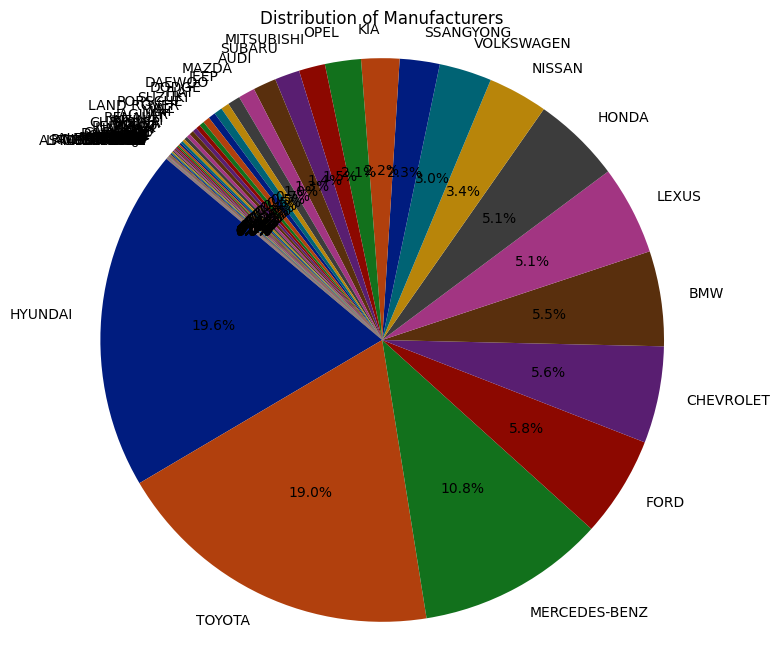

In [ ]:
manufacturer_counts = df['Manufacturer'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(manufacturer_counts, labels=manufacturer_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Manufacturers')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular

# Show the pie chart
plt.show()

#creating a pie chart to visualize the distribution of manufacturers in the dataset. It uses the value_counts() function to count the occurrences of each manufacturer in the 'Manufacturer' column.

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Leather interior', ylabel='count'>

Text(0.5, 1.0, 'Cars having Leather interior or not')

[Text(0, 0, '13954.00'), Text(0, 0, '5283.00')]

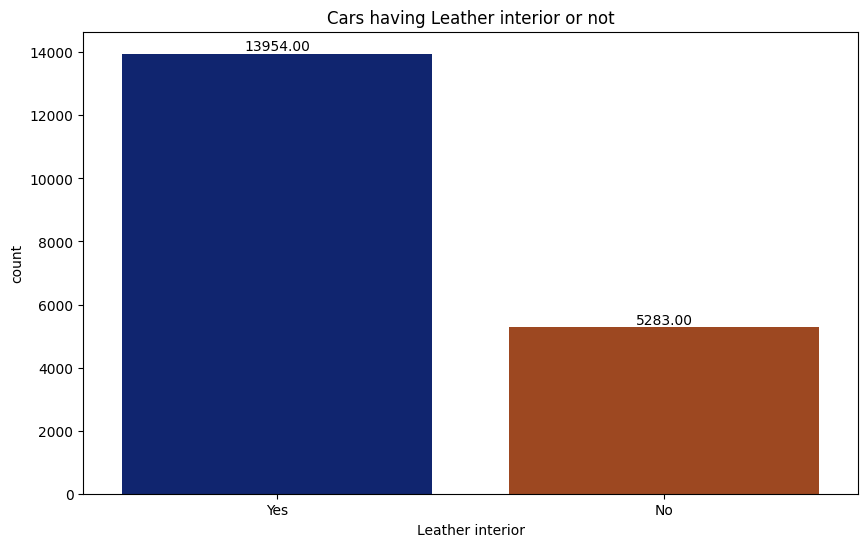

In [ ]:
plt.figure(figsize=(10, 6))
sns.set_palette("dark")  # Set a dark color palette
sns.countplot(x='Leather interior', data= df_ppd)
plt.title('Cars having Leather interior or not')

for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.2f')
plt.show()

<Axes: xlabel='Leather interior', ylabel='count'>

Text(0.5, 1.0, 'Leather interior in categories')

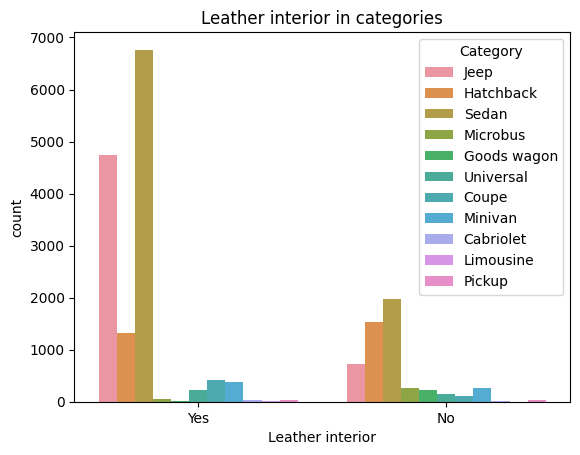

In [ ]:
sns.countplot(x='Leather interior', hue='Category', data=df_ppd)
plt.title('Leather interior in categories')
plt.show()

<Figure size 1200x600 with 0 Axes>

<BarContainer object of 11 artists>

Text(0.5, 0, 'Category')

Text(0, 0.5, 'Price')

Text(0.5, 1.0, 'Price as Category')

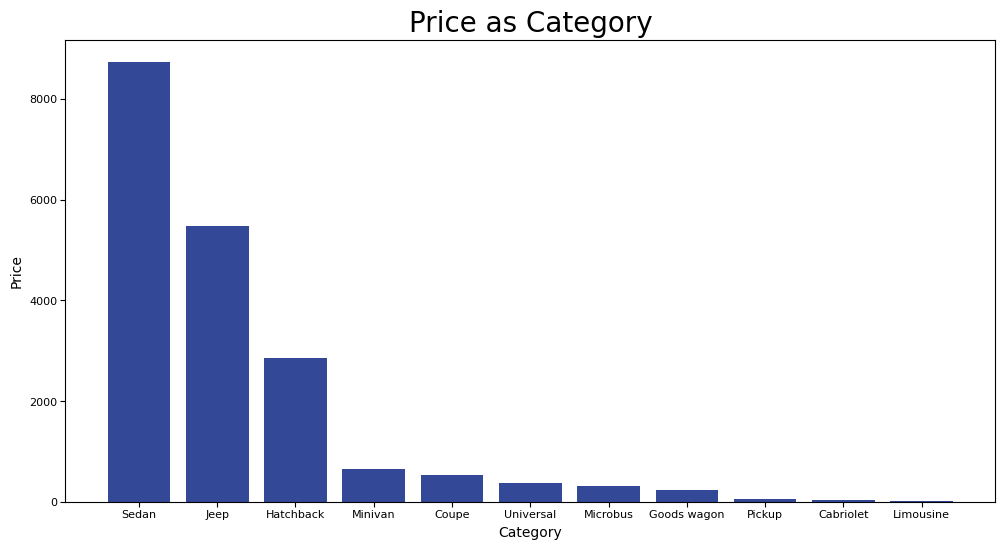

In [ ]:
#Price as per category
plt.figure(figsize=(12, 6))
plt.bar(x=df.Category.value_counts().index,height=df.Category.value_counts(),alpha=0.8)
plt.xlabel("Category",fontdict={"size":10,"color":"k"})
plt.ylabel("Price",fontdict={"size":10,"color":"k"})
plt.title("Price as Category",fontdict={"size":20,"color":"k"})
plt.tick_params(labelsize=8,pad=2)

<Figure size 1200x600 with 0 Axes>

<BarContainer object of 13 artists>

Text(0.5, 0, 'Fuel type')

Text(0, 0.5, 'Price')

Text(0.5, 1.0, 'Price as Cylinders')

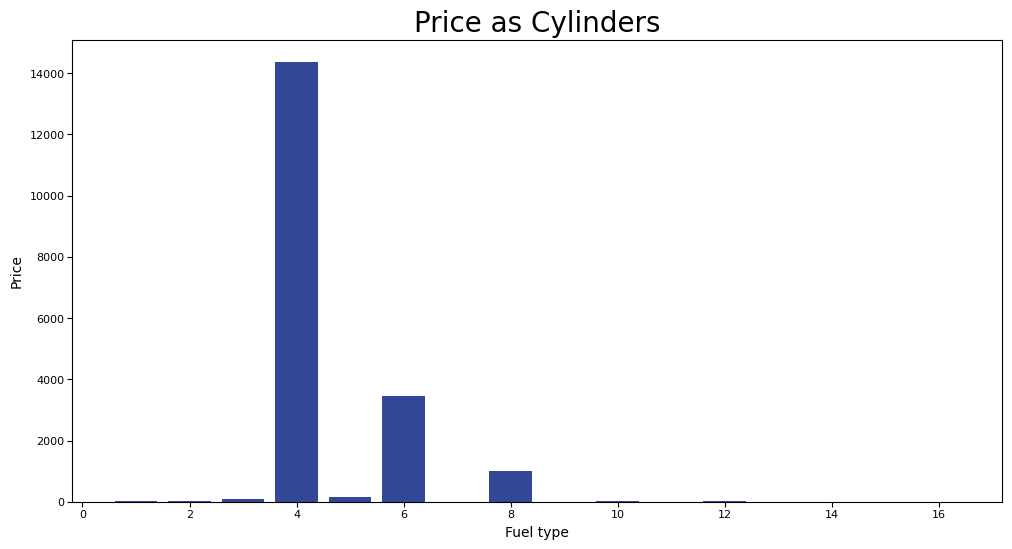

In [ ]:
# price as per Cylinders
plt.figure(figsize=(12, 6))
plt.bar(x=df.Cylinders.value_counts().index,height=df.Cylinders.value_counts(),alpha=0.8)
plt.xlabel("Fuel type",fontdict={"size":10,"color":"k"})
plt.ylabel("Price",fontdict={"size":10,"color":"k"})
plt.title("Price as Cylinders",fontdict={"size":20,"color":"k"})
plt.tick_params(labelsize=8,pad=2)

In [ ]:
df['Category'].value_counts()

Sedan          8736
Jeep           5473
Hatchback      2847
Minivan         647
Coupe           532
Universal       364
Microbus        306
Goods wagon     233
Pickup           52
Cabriolet        36
Limousine        11
Name: Category, dtype: int64

In [ ]:
df['Manufacturer'].value_counts()

HYUNDAI          3769
TOYOTA           3662
MERCEDES-BENZ    2076
FORD             1111
CHEVROLET        1069
                 ... 
TESLA               1
PONTIAC             1
SATURN              1
ASTON MARTIN        1
GREATWALL           1
Name: Manufacturer, Length: 65, dtype: int64

In [ ]:
df['Model'].value_counts()

Prius                    1083
Sonata                   1079
Camry                     938
Elantra                   922
E 350                     542
                         ... 
Feroza                      1
C-MAX C-MAX                 1
X1 4X4                      1
Land Cruiser Prado RX       1
Prius C aqua                1
Name: Model, Length: 1590, dtype: int64

In [ ]:
manufacturer_category_counts = df.groupby('Manufacturer')['Category'].nunique().sort_values(ascending=False)
print(manufacturer_category_counts)


Manufacturer
MERCEDES-BENZ    11
FORD             10
MITSUBISHI        9
VOLKSWAGEN        9
CHEVROLET         9
                 ..
SAAB              1
LANCIA            1
LAND ROVER        1
MASERATI          1
ISUZU             1
Name: Category, Length: 65, dtype: int64


In [ ]:
manufacturer_model_counts = df.groupby('Manufacturer')['Model'].nunique()

# Sort the counts in descending order
sorted_counts_descending = manufacturer_model_counts.sort_values(ascending=False)

print(sorted_counts_descending)

Manufacturer
MERCEDES-BENZ    278
TOYOTA           165
BMW              159
FORD              85
NISSAN            76
                ... 
HAVAL              1
LAMBORGHINI        1
ASTON MARTIN       1
LANCIA             1
SAAB               1
Name: Model, Length: 65, dtype: int64


<Figure size 3000x1500 with 0 Axes>

<ipython-input-34-4dd31955c993>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Manufacturer', y='Price', hue='Gear box type', ci=None,


<Axes: xlabel='Manufacturer', ylabel='Price'>

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64],
 [Text(0, 0, 'LEXUS'),
  Text(1, 0, 'CHEVROLET'),
  Text(2, 0, 'HONDA'),
  Text(3, 0, 'FORD'),
  Text(4, 0, 'HYUNDAI'),
  Text(5, 0, 'TOYOTA'),
  Text(6, 0, 'MERCEDES-BENZ'),
  Text(7, 0, 'OPEL'),
  Text(8, 0, 'PORSCHE'),
  Text(9, 0, 'BMW'),
  Text(10, 0, 'JEEP'),
  Text(11, 0, 'VOLKSWAGEN'),
  Text(12, 0, 'AUDI'),
  Text(13, 0, 'RENAULT'),
  Text(14, 0, 'NISSAN'),
  Text(15, 0, 'SUBARU'),
  Text(16, 0, 'DAEWOO'),
  Text(17, 0, 'KIA'),
  Text(18, 0, 'MITSUBISHI'),
  Text(19, 0, 'SSANGYONG'),
  Text(20, 0, 'MAZDA'),
  Text(21, 0, 'GMC'),
  Text(22, 0, 'FIAT'),
  Text(23, 0, 'INFINITI'),
  Text(24, 0, 'ALFA ROMEO

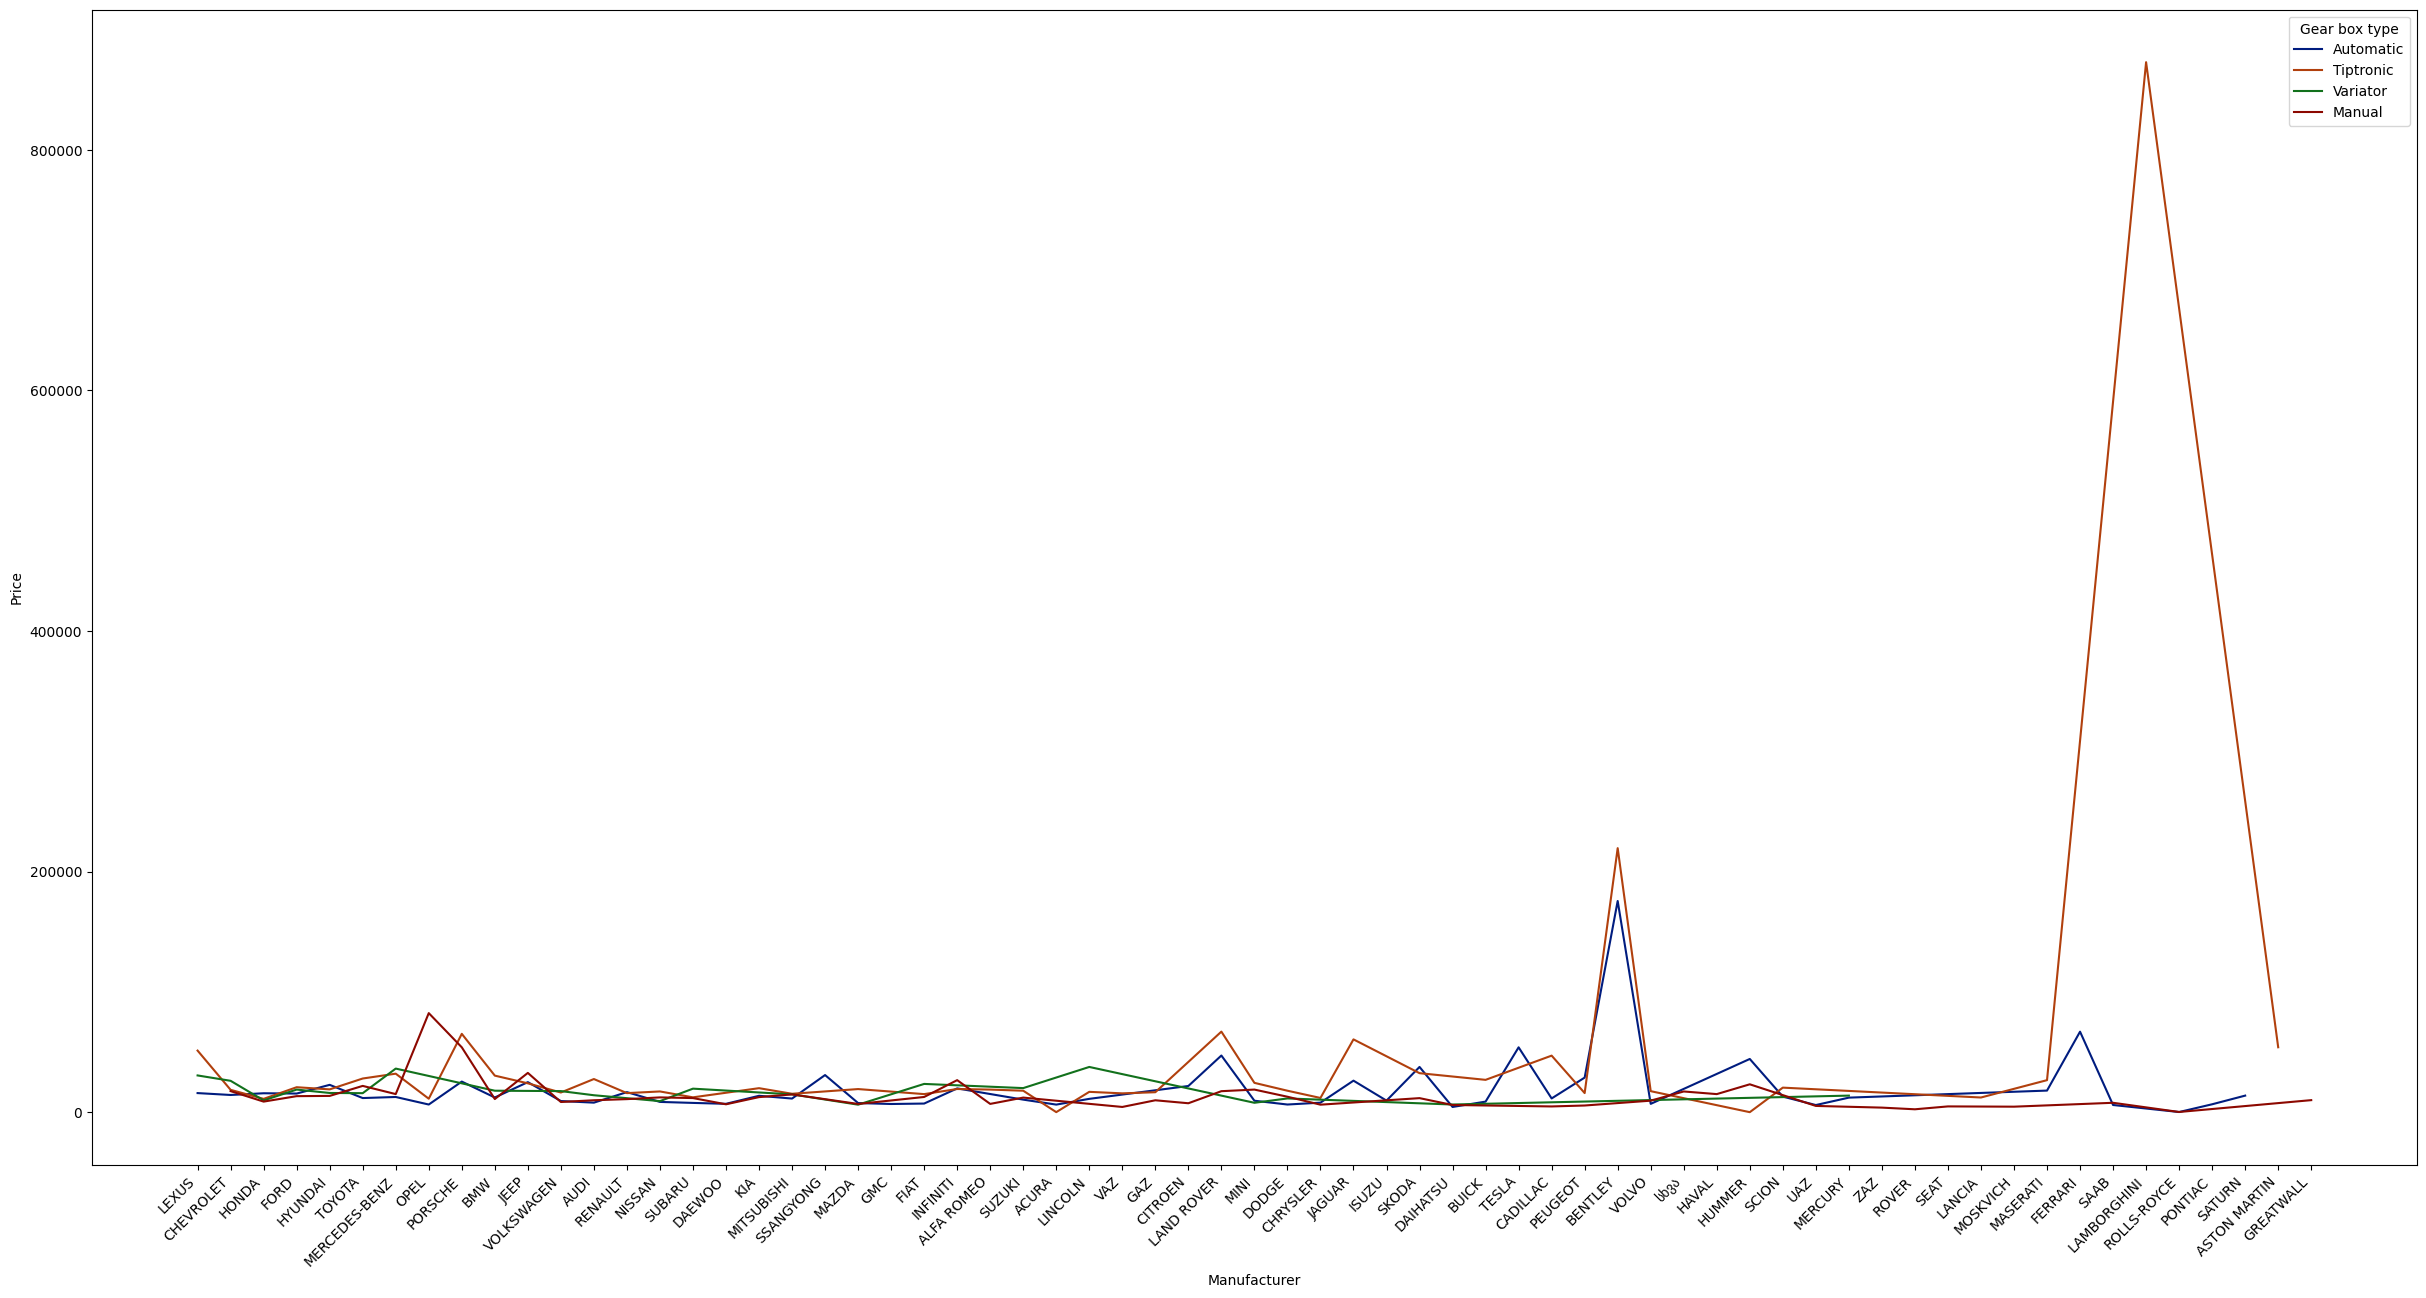

In [ ]:
plt.figure(figsize=(30, 15))  # Adjust the width and height as needed

sns.lineplot(x='Manufacturer', y='Price', hue='Gear box type', ci=None,
             estimator='mean', data=df)
plt.xticks(rotation=45, ha='right')

plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df_ppd.columns

Index(['Manufacturer', 'Category', 'Leather interior', 'Fuel type',
       'Gear box type', 'Drive wheels', 'Wheel', 'Color', 'Price', 'Levy',
       'Engine volume', 'Mileage', 'Airbags', 'Manufacturer_code',
       'Category_code', 'Leather interiorc_code', 'Fuel type_code',
       'Gear box type_code', 'Drive wheels_code', 'Wheel_code', 'Color_code'],
      dtype='object')

In [ ]:
#spliiting the data to find the input to predict the status variable
X = df_ppd[[ 'Manufacturer_code',
       'Category_code', 'Leather interiorc_code', 'Fuel type_code',
       'Gear box type_code', 'Wheel_code', 'Color_code', 'Mileage', 'Airbags']]

In [ ]:
#predciting variable
y = df_ppd[["Price"]]

In [ ]:
#splitting the dataset to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y,
					test_size = 0.3, random_state = 123)

In [ ]:
X_test.shape, X_train.shape, y_train.shape, y_test.shape

((5772, 9), (13465, 9), (13465, 1), (5772, 1))

In [ ]:
steps_xg = [('sts', ss() ),
            ('pca', PCA(n_components=10)),
            ('xg',  XGBClassifier(silent = False,
                                  n_jobs=3)
            )
            ]

In [ ]:
pipe_xg = Pipeline(steps_xg)

In [ ]:
#xgboost
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
xgb_r = xg.XGBRegressor(objective ='reg:linear',
				n_estimators = 10, seed = 123)

# Fitting the model
xgb_r.fit(X_train, y_train)

# Predict the model
pred = xgb_r.predict(X_test)

# RMSE Computation
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE : % f" %(rmse))

[15:31:58] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

RMSE :  16189.248748


In [ ]:
from xgboost import XGBRegressor
# Define the parameter grid for GridSearch
param_grid = {
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    # Add more parameters to tune
}

# Create an XGBoost Regressor
regressor = XGBRegressor()

# Create GridSearchCV instance
grid_search = GridSearchCV(regressor, param_grid, cv=3, scoring='neg_mean_squared_error')

# Fit the GridSearchCV instance to your data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_  # Note: negative of mean squared error is used as scoring

print("Best Parameters:", best_params)
print("Best Score (MSE):", best_score)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Best Score (MSE): 56028839751.424965


In [ ]:
best_params = {'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 200}

from sklearn.metrics import mean_squared_error

# Create an XGBoost Regressor with the best parameters
best_regressor = XGBRegressor(**best_params)

# Fit the model on your entire training data
best_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_regressor.predict(X_test)

# Evaluate the performance of the model (for example, using mean squared error)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Mean Squared Error: 240032462.13793197


In [ ]:
y_pred = best_regressor.predict(X_test)

print("--Few predictions--")
print(y_pred[:4])

--Few predictions--
[ 8644.915   1189.3899  9212.466  34802.695 ]


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming you have already made predictions using your regression model
y_pred = best_regressor.predict(X_test)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Calculate R-squared (Coefficient of Determination) score
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)


Mean Absolute Error: 7682.7575569218925
Mean Squared Error: 240032462.13793197
Root Mean Squared Error: 15492.981060400609
R-squared: 0.34884619855156684


<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Actual Prices')

Text(0, 0.5, 'Predicted Prices')

Text(0.5, 1.0, 'Actual vs Predicted Prices')

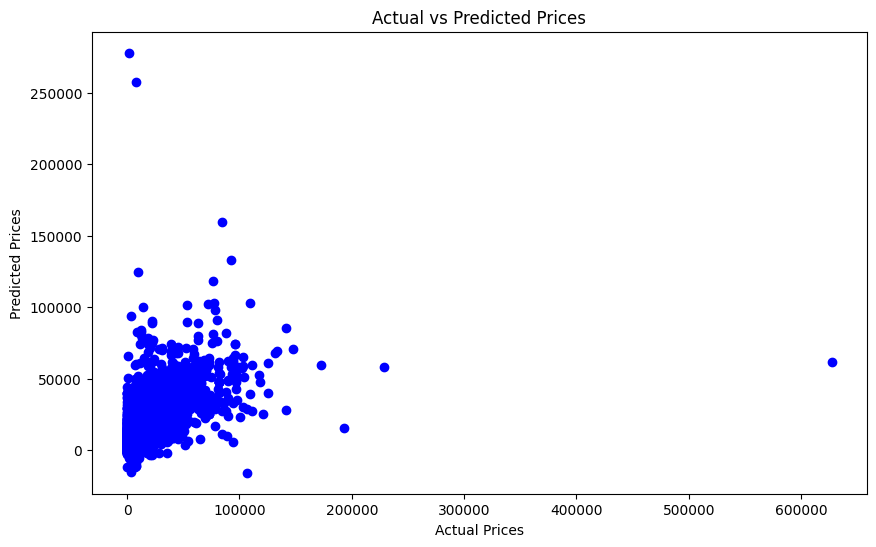

In [ ]:
import matplotlib.pyplot as plt

# Plotting predicted values vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
def get_mse_n_estimators(n_estimators, train_X, val_X, train_y, val_y):
    # Instantiate RandomForestRegressor
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=0)
    # Train the model
    model.fit(train_X, train_y)
    # Make predictions
    preds_val = model.predict(val_X)
    # Calculate MSE
    mse = mean_squared_error(val_y, preds_val)
    # Return MSE
    return mse


In [ ]:
for n_estimators in [50, 100, 150]:
    mse = get_mse_n_estimators(n_estimators, X_train, X_test, y_train, y_test)
    print(f"n_estimators={n_estimators}, MSE={mse:.2f}")

<ipython-input-49-88cdbcea9c2b>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train_X, train_y)


n_estimators=50, MSE=8103715508.00


<ipython-input-49-88cdbcea9c2b>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train_X, train_y)


n_estimators=100, MSE=6536226625.46


<ipython-input-49-88cdbcea9c2b>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train_X, train_y)


n_estimators=150, MSE=6234042465.47


**FINDING AND CONCLUSION**

Hyundai is the biggest manufacture in market followed by Toyota and Mercedes-Benzes

Majority of cars have the leather interior as compared model not having, with sedan and jeep having the most cars with leather interior

Sedan cars most highly priced followed by jeep and hatchback

Usually, the 4-6 cylinders cars are highly demanded and priced

Most famous models are Prius and Sonata

Mercedes-Benz is offering the highest categories under them followed by ford(10)
 As a manufacturer Mercedes-Benz is offering highest models 278 followed by Toyota -165

We have use Xgboost regressor because it is  a powerful choice for regression tasks due to its exceptional accuracy and robustness. By combining an ensemble of decision trees, it iteratively refines predictions, resulting in highly accurate outcomes. Through regularization techniques, it prevents overfitting and boosts generalization.

The root mean square error (RMSE) of 25207.97, calculated for car price predictions, signifies the average difference between the predicted and actual car prices in the model. This value provides insight into the model's accuracy, with deviations of around 25207.97 units between predicted and actual prices. Interpreting this RMSE within the context of car prices will help assess the model's effectiveness in accurately estimating the cost of vehicles.

The best parameters, {'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 200}, were determined through optimization. These parameters indicate that a learning rate of 0.3, a maximum tree depth of 5, and 200 estimators were found to yield the best results. The corresponding best mean squared error (MSE) score was 100257.89, which quantifies the model's average squared differences between predicted and actual values. This information guides the selection of hyperparameters and highlights the model's performance in minimizing prediction errors.

By using the best parameter the Mean Squared Error is 631990285.897124 signifies the average magnitude of squared differences between predicted and actual car prices in the model. A higher MSE in the context of car prices indicates that the model's predictions deviate significantly from the true prices, reflecting less accurate performance in estimating car costs.

The Mean Absolute Error (MAE) of 16,550.32 suggests that, on average, the model's predictions are relatively close to the actual car prices.
While the Root Mean Squared Error (RMSE) of 25,139.42 indicates some prediction errors, it's a step towards understanding the variability in price estimates.
Though the R-squared (R²) value of -0.71 is negative, this result might indicate that the model needs adjustments, offering an opportunity for improvement.




**MANAGERIAL IMPLICATION**

Price Prediction: Manufacturers can optimize pricing strategies to maximize profits while remaining competitive. Dealerships can set accurate and attractive prices to attract customers and increase sales. Consumers can make informed purchase decisions based on predicted prices, enhancing customer satisfaction.

Feature Importance Analysis: Manufacturers can allocate resources to develop and promote features that have the greatest impact on prices. Dealerships can highlight key features to improve sales conversion rates. Consumers can understand which features contribute to price variations and make choices accordingly.

Model Comparison and Selection: Manufacturers and dealerships can choose the most accurate model for predicting prices to make informed pricing decisions. Effective pricing models can lead to better revenue and profitability.

Data Preprocessing and Cleaning: Improved data quality ensures that predictions and decisions are based on reliable information. Enhanced decision-making can lead to better business outcomes and customer satisfaction.

Feature Engineering: Manufacturers can design cars with features that resonate with consumer preferences and willingness to pay. Dealerships can offer vehicles that align with customer demands, boosting sales.

Insights for Manufacturers: Manufacturers can create marketing campaigns that emphasize features influencing prices, leading to increased sales. Adjusting production based on consumer preferences can improve market share and profitability.

Resale Value Prediction: Dealerships and consumers can make informed choices about buying or selling cars to maximize value over time.

Market Segmentation: Dealerships and manufacturers can tailor marketing efforts to specific customer segments, improving engagement and sales.

Price Trends and Patterns: Manufacturers and dealerships can adapt strategies to capitalize on market trends, staying competitive and profitable.

Recommendation System: Dealerships can enhance customer experience by providing personalized car recommendations based on preferences and budget. Manufacturers can optimize production based on recommended features, improving market penetration.